# Bus Routes (Problem 815)

You are given an array routes representing bus routes where routes[i] is a bus route that the ith bus repeats forever.

For example, if routes[0] = [1, 5, 7], this means that the 0th bus travels in the sequence 1 -> 5 -> 7 -> 1 -> 5 -> 7 -> 1 -> ... forever.
You will start at the bus stop source (You are not on any bus initially), and you want to go to the bus stop target. You can travel between bus stops by buses only.

Return the least number of buses you must take to travel from source to target. Return -1 if it is not possible.

The idea is to build a graph in which each node is a bus stop and each edge is a bus. Then, we can use BFS to find the shortest path from source to target.

In [62]:
import networkx as nx
def building_graph(routes):
    G = nx.DiGraph()
    index_array = 0
    for array in routes: 
        G.add_node(array[0], bus_number = [index_array])
        G.add_node(array[-1], bus_number = [index_array])
        G.add_edge(array[-1],array[0])
        for n in range(1,len(array)-1):
            print(array[n])
            if array[n] not in G.nodes():
                G.add_node(array[n], bus_number = [index_array])
                G.add_edge(array[n-1],array[n])
            elif array[n] in G.nodes():
                print('here')
                print(G.nodes[array[n]]['bus_number'])
                G.nodes[array[n]]['bus_number']+=[index_array]
                G.add_edge(array[n],array[n+1])
        index_array += 1
    return G
                


Test cases:
1) routes = [[1,2,7],[3,6,7]], source = 1, target = 6
2) routes = [[7,12],[4,5,15],[6],[15,19],[9,12,13]], source = 15, target = 12

2
3
5
7
8
9


NodeDataView({1: {'bus_number': [0]}, 4: {'bus_number': [1]}, 2: {'bus_number': [0]}, 3: {'bus_number': [0]}, 6: {'bus_number': [2]}, 5: {'bus_number': [1]}, 10: {'bus_number': [2]}, 7: {'bus_number': [2]}, 8: {'bus_number': [2]}, 9: {'bus_number': [2]}})

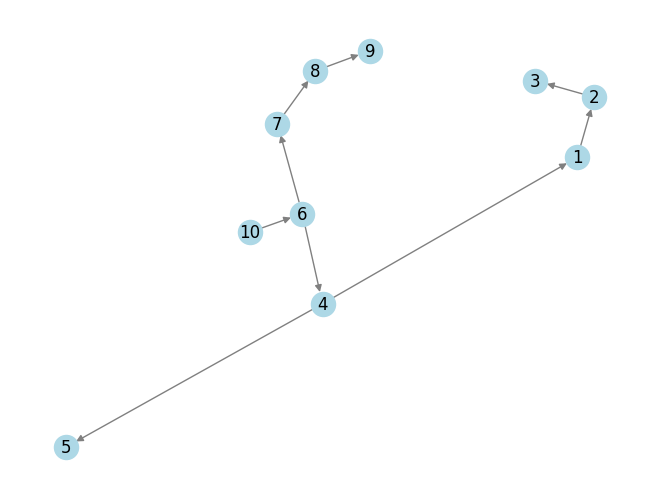

In [63]:
routes = [[1, 2, 3, 4], [4, 5, 6], [6, 7, 8, 9, 10]]
G = building_graph(routes)
# Plot the graph
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='grey')
G.nodes(data=True)

In [19]:
# Finding the shortest path
source = 1
target = 4
shortest_path = nx.shortest_path(building_graph(routes), source, target)
print(shortest_path)

[1, 2, 3, 4]
